In [1]:
import wandb

qwen_14b = wandb.Api().run("bradhilton/rl-experiments/044")
display(qwen_14b)
qwen_32b = wandb.Api().run("bradhilton/rl-experiments/060")
display(qwen_32b)

<Run bradhilton/rl-experiments/044 (running)>

<Run bradhilton/rl-experiments/060 (running)>

In [2]:
display(qwen_14b.history())
display(qwen_32b.history())

,acc,_step,exceptions,_runtime,iteration,reward,tokens,early_stop,_timestamp,loss,entropy,kl_div,tokens_per_second_per_gpu,policy
0,0.280952,0,[],629.746387,0,0.280952,877,0.046875,1.740435e+09,NaN,NaN,NaN,NaN,NaN
1,0.320433,1,[],1960.169698,1,0.320433,888,0.046875,1.740436e+09,0.008005,1.000631,NaN,839.646978,0.008005
2,0.331966,2,[],3262.317404,2,0.331966,901,0.007812,1.740438e+09,0.004478,0.890547,NaN,839.587832,0.004478
3,0.329734,3,[],4554.795818,3,0.329734,881,0.015625,1.740439e+09,0.004791,0.795100,NaN,860.467297,0.004791
4,0.357115,4,[],5900.604002,4,0.357115,892,NaN,1.740440e+09,0.001724,0.800749,NaN,849.581840,0.001724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,0.554976,118,[],52787.056352,116,0.554976,2011,0.007812,1.740806e+09,0.004558,0.104922,NaN,936.885771,0.004558
119,0.532915,119,[],3621.921002,117,0.532915,1979,NaN,1.740846e+09,0.012588,0.079885,NaN,682.055906,0.012588
120,0.549284,120,[],1493.834541,118,0.549284,2174,NaN,1.740851e+09,0.012846,0.107831,NaN,727.968584,0.012846
121,0.496419,121,[],6969.516758,119,0.496419,2249,NaN,1.740857e+09,0.004908,0.155477,NaN,820.852052,0.004908


,acc,_step,exceptions,_runtime,iteration,reward,tokens,_timestamp,loss,entropy,kl_div,tokens_per_second_per_gpu,policy,early_stop
0,0.372638,0,[],477.910772,0,0.372638,880,1.740620e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,0.365160,1,[],1709.056202,1,0.365160,897,1.740621e+09,0.004785,0.671667,NaN,607.181294,0.004785,NaN
2,0.391332,2,[],2921.763188,2,0.391332,895,1.740622e+09,0.001789,0.582535,NaN,607.332975,0.001789,0.007812
3,0.399061,3,[],4106.496217,3,0.399061,946,1.740624e+09,-0.000225,0.547358,NaN,621.349511,-0.000225,0.007812
4,0.414593,4,[],5317.971585,4,0.414593,913,1.740625e+09,-0.007063,0.543221,NaN,615.624614,-0.007063,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,0.623633,221,[],33063.535253,219,0.623633,65,1.741126e+09,0.004240,0.013348,NaN,433.907021,0.004240,NaN
222,0.616797,222,[],33732.188763,220,0.616797,118,1.741127e+09,NaN,NaN,NaN,NaN,NaN,NaN
223,0.629213,223,[],34270.111245,221,0.629213,59,1.741127e+09,NaN,NaN,NaN,NaN,NaN,NaN
224,0.617494,224,[],34958.108126,222,0.617494,59,1.741128e+09,NaN,NaN,NaN,NaN,NaN,NaN


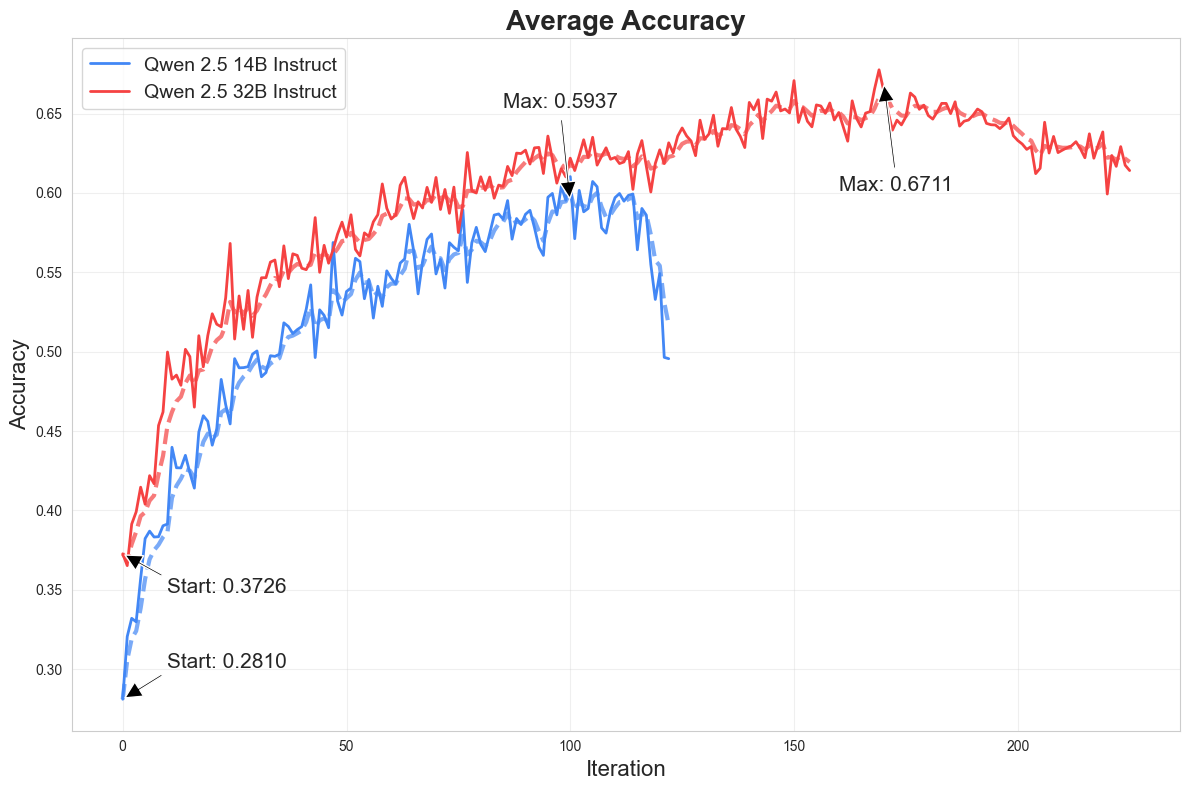

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style for the plots
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Get the history data
qwen_14b_history = qwen_14b.history()
qwen_32b_history = qwen_32b.history()

# Plot the accuracy over iterations
plt.plot(
    qwen_14b_history["_step"],
    qwen_14b_history["acc"],
    linestyle="-",
    linewidth=2,
    label="Qwen 2.5 14B Instruct",
    color="#4287f5",
)
plt.plot(
    qwen_32b_history["_step"],
    qwen_32b_history["acc"],
    linestyle="-",
    linewidth=2,
    label="Qwen 2.5 32B Instruct",
    color="#f54242",
)

# Add a trend line (moving average)
qwen_14b_rolling = qwen_14b_history["acc"].ewm(1.5).mean()
qwen_32b_rolling = qwen_32b_history["acc"].ewm(2.5).mean()
plt.plot(
    qwen_14b_history["_step"],
    qwen_14b_rolling,
    linestyle="--",
    linewidth=3,
    color="#4287f5",
    alpha=0.7,
)
plt.plot(
    qwen_32b_history["_step"],
    qwen_32b_rolling,
    linestyle="--",
    linewidth=3,
    color="#f54242",
    alpha=0.7,
)

# Customize the plot
plt.title("Average Accuracy", fontsize=20, fontweight="bold")
plt.xlabel("Iteration", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.legend(fontsize=14)
plt.grid(True, alpha=0.3)

# Add annotations for the highest accuracy points using the rolling average
# max_acc_14b = qwen_14b_rolling.max()
# max_acc_32b = qwen_32b_rolling.max()
max_acc_14b = 0.5936918712797619 # hard coded
max_acc_32b = 0.671084740048363 # hard coded
max_step_14b = qwen_14b_history.loc[qwen_14b_rolling.idxmax()]["_step"]
max_step_32b = qwen_32b_history.loc[qwen_32b_rolling.idxmax()]["_step"]

# Moved the 14B annotation to a higher position to avoid overlap with 32B line
plt.annotate(
    f"Max: {max_acc_14b:.4f}",
    xy=(max_step_14b, max_acc_14b),
    xytext=(max_step_14b - 15, max_acc_14b + 0.06),  # Moved even higher
    arrowprops=dict(facecolor="black", shrink=0.05, width=1.5),
    fontsize=15,
)

plt.annotate(
    f"Max: {max_acc_32b:.4f}",
    xy=(max_step_32b, max_acc_32b),
    xytext=(max_step_32b - 10, max_acc_32b - 0.07),  # Moved further down
    arrowprops=dict(facecolor="black", shrink=0.05, width=1.5),
    fontsize=15,
)

# Add annotations for the initial (base) values
initial_acc_14b = qwen_14b_history["acc"].iloc[0]
initial_acc_32b = qwen_32b_history["acc"].iloc[0]
initial_step_14b = qwen_14b_history["_step"].iloc[0]
initial_step_32b = qwen_32b_history["_step"].iloc[0]

plt.annotate(
    f"Start: {initial_acc_14b:.4f}",
    xy=(initial_step_14b, initial_acc_14b),
    xytext=(initial_step_14b + 10, initial_acc_14b + 0.02),
    arrowprops=dict(facecolor="black", shrink=0.05, width=1.5),
    fontsize=15,
)

plt.annotate(
    f"Start: {initial_acc_32b:.4f}",
    xy=(initial_step_32b, initial_acc_32b),
    xytext=(initial_step_32b + 10, initial_acc_32b - 0.025),
    arrowprops=dict(facecolor="black", shrink=0.05, width=1.5),
    fontsize=15,
)

# Improve aesthetics
plt.tight_layout()
plt.show()

/var/folders/44/w80xfzps3qn38ng1r0yvg22r0000gn/T/ipykernel_93674/3938084825.py:94: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.loglog(
/var/folders/44/w80xfzps3qn38ng1r0yvg22r0000gn/T/ipykernel_93674/3938084825.py:105: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.loglog(


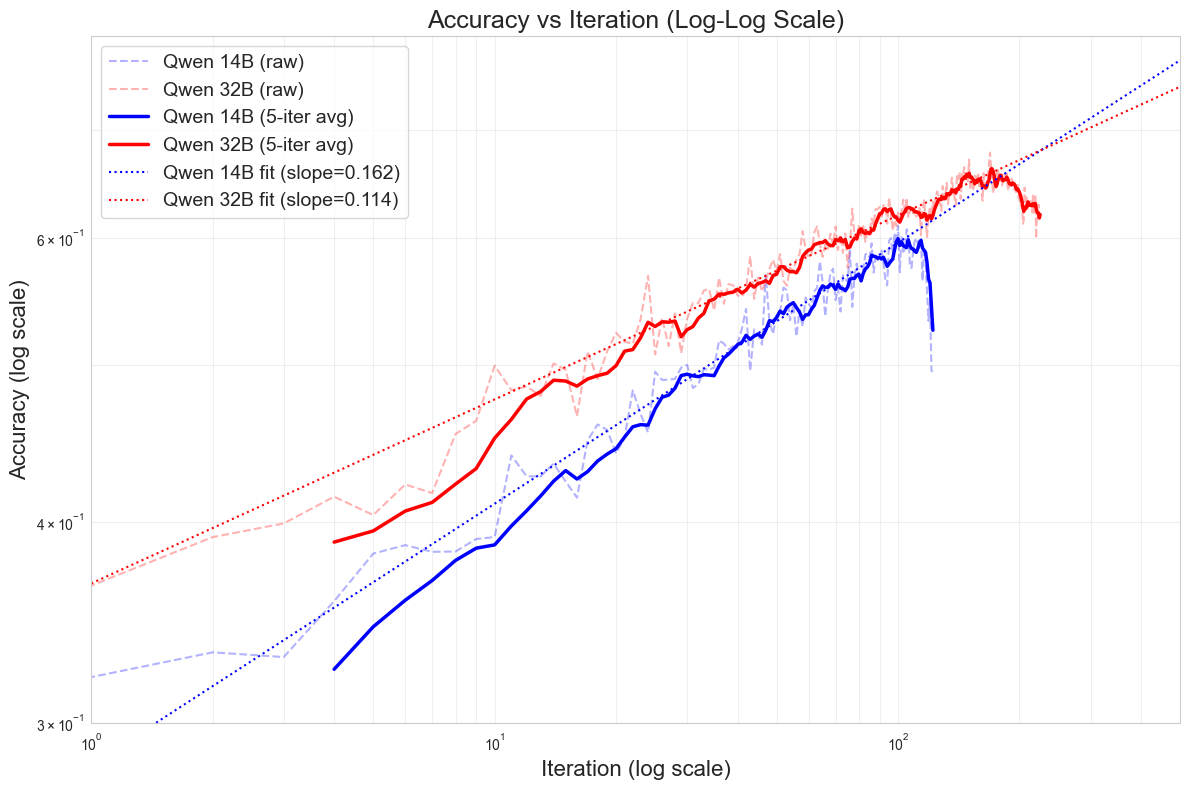

In [26]:
# Create a log-log plot of the same data
plt.figure(figsize=(12, 8))

# Calculate rolling averages
qwen_14b_rolling = qwen_14b_history["acc"].rolling(window=5).mean()
qwen_32b_rolling = qwen_32b_history["acc"].rolling(window=5).mean()

# Find index of maximum value in rolling averages
qwen_14b_max_idx = qwen_14b_rolling.idxmax()
qwen_32b_max_idx = qwen_32b_rolling.idxmax()

# Plot the raw data with dashed lines and lower alpha
plt.loglog(
    qwen_14b_history["_step"],
    qwen_14b_history["acc"],
    "b--",
    alpha=0.3,
    label="Qwen 14B (raw)",
)
plt.loglog(
    qwen_32b_history["_step"],
    qwen_32b_history["acc"],
    "r--",
    alpha=0.3,
    label="Qwen 32B (raw)",
)

# Plot the moving averages with solid lines
plt.loglog(
    qwen_14b_history["_step"],
    qwen_14b_rolling,
    "b-",
    linewidth=2.5,
    label="Qwen 14B (5-iter avg)",
)
plt.loglog(
    qwen_32b_history["_step"],
    qwen_32b_rolling,
    "r-",
    linewidth=2.5,
    label="Qwen 32B (5-iter avg)",
)

# Fit linear regressions to the log-log data for both models
import numpy as np
from sklearn.linear_model import LinearRegression

# Fit regression for Qwen 14B from iteration 10 to max
start_iter = 10
q14b_valid_indices = (qwen_14b_history["_step"] >= start_iter) & (qwen_14b_history.index <= qwen_14b_max_idx)
q14b_valid_steps = qwen_14b_history["_step"][q14b_valid_indices].values
q14b_valid_acc = qwen_14b_history["acc"][q14b_valid_indices].values

# Take logs of valid values for 14B
q14b_log_x = np.log(q14b_valid_steps).reshape(-1, 1)
q14b_log_y = np.log(q14b_valid_acc)

# Check for any infinities or NaNs in 14B data
q14b_mask = np.isfinite(q14b_log_x.flatten()) & np.isfinite(q14b_log_y)
q14b_log_x = q14b_log_x[q14b_mask]
q14b_log_y = q14b_log_y[q14b_mask]
q14b_log_x = q14b_log_x.reshape(-1, 1)

# Fit 14B model
q14b_model = LinearRegression().fit(q14b_log_x, q14b_log_y)
q14b_slope = q14b_model.coef_[0]
q14b_intercept = q14b_model.intercept_

# Fit regression for Qwen 32B from iteration 10 to max
q32b_valid_indices = (qwen_32b_history["_step"] >= start_iter) & (qwen_32b_history.index <= qwen_32b_max_idx)
q32b_valid_steps = qwen_32b_history["_step"][q32b_valid_indices].values
q32b_valid_acc = qwen_32b_history["acc"][q32b_valid_indices].values

# Take logs of valid values for 32B
q32b_log_x = np.log(q32b_valid_steps).reshape(-1, 1)
q32b_log_y = np.log(q32b_valid_acc)

# Check for any infinities or NaNs in 32B data
q32b_mask = np.isfinite(q32b_log_x.flatten()) & np.isfinite(q32b_log_y)
q32b_log_x = q32b_log_x[q32b_mask]
q32b_log_y = q32b_log_y[q32b_mask]
q32b_log_x = q32b_log_x.reshape(-1, 1)

# Fit 32B model
q32b_model = LinearRegression().fit(q32b_log_x, q32b_log_y)
q32b_slope = q32b_model.coef_[0]
q32b_intercept = q32b_model.intercept_

# Create x values for regression lines (extend across whole plot)
x_range = np.linspace(np.log(1), np.log(500), 100)  # From 1 to 500 to cover the whole plot

# Calculate and plot regression line for Qwen 14B
q14b_pred_y = np.exp(q14b_slope * x_range + q14b_intercept)
plt.loglog(
    np.exp(x_range), 
    q14b_pred_y, 
    'b-', 
    linewidth=1.5, 
    linestyle='dotted',
    label=f'Qwen 14B fit (slope={q14b_slope:.3f})'
)

# Calculate and plot regression line for Qwen 32B
q32b_pred_y = np.exp(q32b_slope * x_range + q32b_intercept)
plt.loglog(
    np.exp(x_range), 
    q32b_pred_y, 
    'r-', 
    linewidth=1.5, 
    linestyle='dotted',
    label=f'Qwen 32B fit (slope={q32b_slope:.3f})'
)

# Set axis limits to ensure visibility up to 0.75 on y-axis and 400 iterations on x-axis
plt.ylim(0.3, 0.8)  # Set y-axis limit to show up to 0.75
plt.xlim(1, 500)  # Set x-axis limit to show up to 400 iterations

# Add labels and title
plt.title("Accuracy vs Iteration (Log-Log Scale)", fontsize=18)
plt.xlabel("Iteration (log scale)", fontsize=16)
plt.ylabel("Accuracy (log scale)", fontsize=16)
plt.legend(fontsize=14)
plt.grid(True, alpha=0.3, which="both")

# Improve aesthetics
plt.tight_layout()
plt.show()

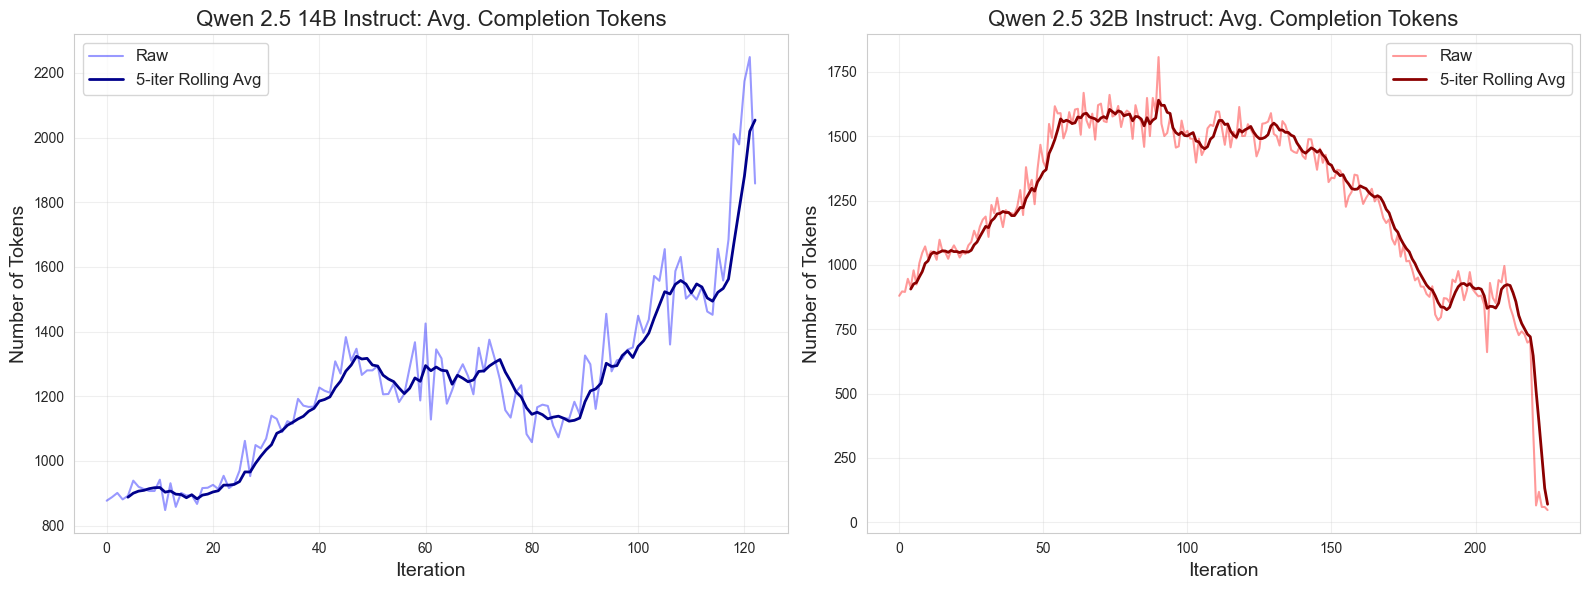

In [27]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Calculate rolling averages with window size of 5
qwen_14b_rolling_avg = qwen_14b_history["tokens"].rolling(window=5).mean()
qwen_32b_rolling_avg = qwen_32b_history["tokens"].rolling(window=5).mean()

# Plot for 14B model
ax1.plot(
    qwen_14b_history.index,
    qwen_14b_history["tokens"],
    linestyle="-",
    color="blue",
    alpha=0.4,
    label="Raw",
)
ax1.plot(
    qwen_14b_history.index,
    qwen_14b_rolling_avg,
    linestyle="-",
    color="darkblue",
    linewidth=2,
    label="5-iter Rolling Avg",
)
ax1.set_title("Qwen 2.5 14B Instruct: Avg. Completion Tokens", fontsize=16)
ax1.set_xlabel("Iteration", fontsize=14)
ax1.set_ylabel("Number of Tokens", fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=12)

# Plot for 32B model
ax2.plot(
    qwen_32b_history.index,
    qwen_32b_history["tokens"],
    linestyle="-",
    color="red",
    alpha=0.4,
    label="Raw",
)
ax2.plot(
    qwen_32b_history.index,
    qwen_32b_rolling_avg,
    linestyle="-",
    color="darkred",
    linewidth=2,
    label="5-iter Rolling Avg",
)
ax2.set_title("Qwen 2.5 32B Instruct: Avg. Completion Tokens", fontsize=16)
ax2.set_xlabel("Iteration", fontsize=14)
ax2.set_ylabel("Number of Tokens", fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=12)

# Improve aesthetics
plt.tight_layout()
plt.show()

In [143]:
qwen_14b_history["acc"].argmax()

100

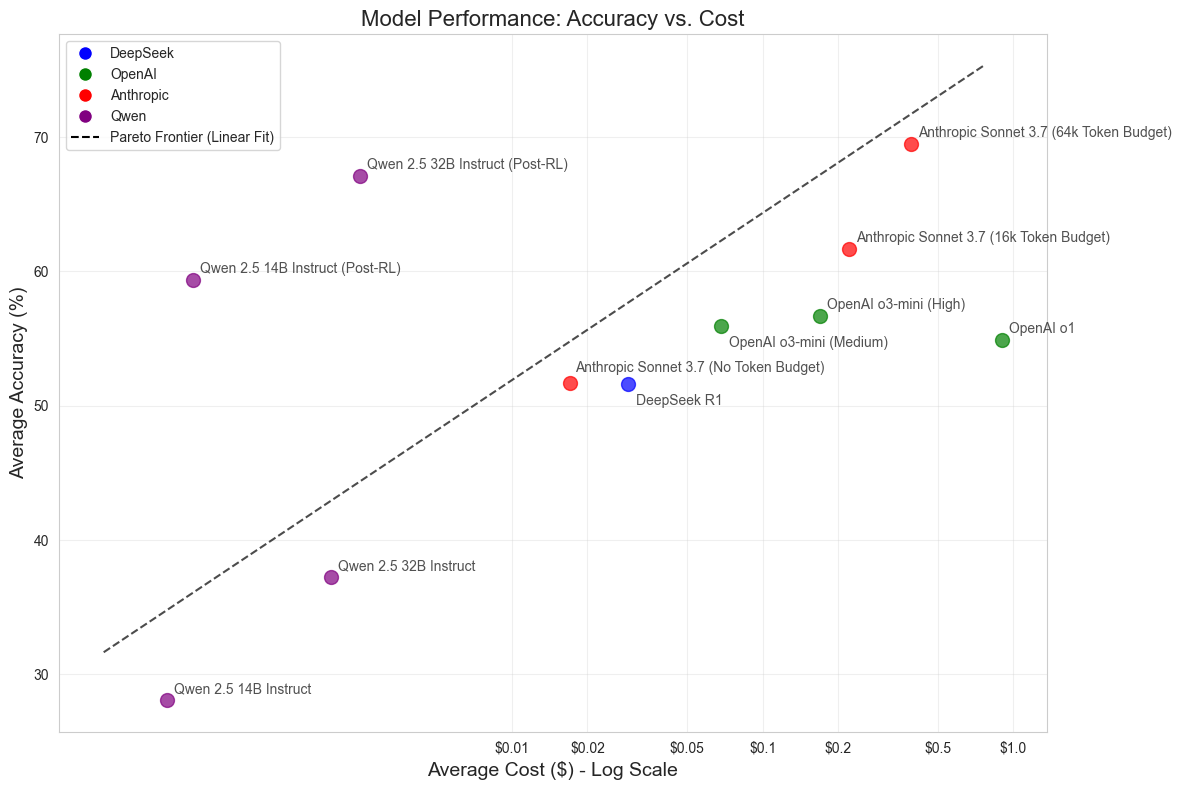

LinearRegression()

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Hard-coded data
organizations = [
    "DeepSeek",
    "OpenAI",
    "OpenAI",
    "OpenAI",
    "Anthropic",
    "Anthropic",
    "Anthropic",
    "Qwen",
    "Qwen",
    "Qwen",
    "Qwen",  # Added Qwen pre and post RL
]
models = [
    "R1",
    "o1",
    "o3-mini",
    "o3-mini",
    "Sonnet 3.7",
    "Sonnet 3.7",
    "Sonnet 3.7",
    "2.5 14B Instruct",
    "2.5 32B Instruct",
    "2.5 14B Instruct (Post-RL)",  # Added Qwen models
    "2.5 32B Instruct (Post-RL)",  # Added Qwen models
]
reasoning_efforts = [
    "",
    "",
    "Medium",
    "High",
    "No Token Budget",
    "16k Token Budget",
    "64k Token Budget",
    "",
    "",
    "",
    "",  # Empty for Qwen
]
accuracies = [
    51.6,
    54.9,
    55.9,
    56.7,
    51.7,
    61.7,
    69.5,
    qwen_14b_history["acc"].iloc[0] * 100,
    qwen_32b_history["acc"].iloc[0] * 100,
    max_acc_14b * 100,
    max_acc_32b * 100,
]  # Added Qwen accuracies
costs = [
    0.029,
    0.901,
    0.068,
    0.170,
    0.017,
    0.222,
    0.392,
    (1220 * 0.2 + qwen_14b_history["tokens"].iloc[0] * 0.2) / 1_000_000,
    (1220 * 0.9 + qwen_32b_history["tokens"].iloc[0] * 0.9) / 1_000_000,
    (
        1220 * 0.2
        + qwen_14b_history["tokens"].iloc[
            qwen_14b_rolling.idxmax()
        ]
        * 0.2
    )
    / 1_000_000,
    (
        1220 * 0.9
        + qwen_32b_history["tokens"].iloc[
            qwen_14b_rolling.idxmax()
        ]
        * 0.9
    )
    / 1_000_000,
]  # Added placeholder costs for Qwen

# Create labels for the data points
labels = [
    f"{org} {model} ({effort})" if effort else f"{org} {model}"
    for org, model, effort in zip(organizations, models, reasoning_efforts)
]

# Create the scatter plot
plt.figure(figsize=(12, 8))

# Define colors for different organizations
org_colors = {
    "DeepSeek": "blue",
    "OpenAI": "green",
    "Anthropic": "red",
    "Qwen": "purple",  # Added color for Qwen
}

# Custom annotation offsets to prevent overlapping
annotation_offsets = [
    (6, -15),  # DeepSeek R1
    (5, 5),  # OpenAI o1
    (6, -15),  # OpenAI o3-mini (Medium)
    (5, 5),  # OpenAI o3-mini (High)
    (4, 8),  # Anthropic Sonnet 3.7 (No Token Budget)
    (5, 5),  # Anthropic Sonnet 3.7 (16k Token Budget)
    (5, 5),  # Anthropic Sonnet 3.7 (64k Token Budget)
    (5, 5),  # Qwen 2.5 14B Instruct (Pre-RL)
    (5, 5),  # Qwen 2.5 14B Instruct (Post-RL)
    (5, 5),  # Qwen 2.5 32B Instruct (Pre-RL)
    (5, 5),  # Qwen 2.5 32B Instruct (Post-RL)
]

# Plot each point with its organization's color
for i, org in enumerate(organizations):
    plt.scatter(costs[i], accuracies[i], color=org_colors[org], s=100, alpha=0.7)
    plt.annotate(
        labels[i],
        (costs[i], accuracies[i]),
        xytext=annotation_offsets[i],
        textcoords="offset points",
        fontsize=10,
        alpha=0.8,
    )

# Set x-axis to logarithmic scale
plt.xscale("log")

# Set custom tick marks for better readability
cost_ticks = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0]
plt.xticks(cost_ticks, ["$" + str(x) for x in cost_ticks])

# Calculate and plot the Pareto frontier (excluding the last two models)
costs_pareto = costs[:-2]
accuracies_pareto = accuracies[:-2]

# Sort points by cost
sorted_indices = np.argsort(costs_pareto)
sorted_costs = np.array(costs_pareto)[sorted_indices]
sorted_accuracies = np.array(accuracies_pareto)[sorted_indices]

# Find the Pareto frontier
pareto_front = []
pareto_indices = []
max_accuracy = float('-inf')

for i in range(len(sorted_costs)):
    if sorted_accuracies[i] > max_accuracy:
        max_accuracy = sorted_accuracies[i]
        pareto_front.append((sorted_costs[i], sorted_accuracies[i]))
        pareto_indices.append(sorted_indices[i])

# Extract x and y coordinates for the Pareto frontier
pareto_costs = [p[0] for p in pareto_front]
pareto_accuracies = [p[1] for p in pareto_front]

# Fit a straight line to the Pareto frontier
from sklearn.linear_model import LinearRegression
pareto_model = LinearRegression()
# Use log of costs for fitting since we're using log scale
log_pareto_costs = np.log(pareto_costs).reshape(-1, 1)
pareto_model.fit(log_pareto_costs, pareto_accuracies)

# Generate points for the fitted line
log_x_range = np.linspace(np.log(min(costs) * 0.8), np.log(max(costs) * 1.2), 100)
y_pred = pareto_model.predict(log_x_range.reshape(-1, 1))

# Shift the pareto frontier up and to the left
shift_up = 4  # Increase accuracy by 3 percentage points
shift_left = 0.7  # Multiply costs by 0.8 (20% reduction)

x_range = np.exp(log_x_range) * shift_left
y_pred = y_pred + shift_up

# Plot the fitted line as the Pareto frontier
plt.plot(
    x_range,
    y_pred,
    'k--',
    linewidth=1.5,
    alpha=0.7,
    label='Pareto Frontier (Linear Fit)'
)

# Add labels and title
plt.xlabel("Average Cost ($) - Log Scale", fontsize=14)
plt.ylabel("Average Accuracy (%)", fontsize=14)
plt.title("Model Performance: Accuracy vs. Cost", fontsize=16)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add a legend for organizations
legend_elements = [
    plt.Line2D(
        [0], [0], marker="o", color="w", markerfacecolor=color, markersize=10, label=org
    )
    for org, color in org_colors.items()
]
# Add Pareto frontier to legend
legend_elements.append(plt.Line2D([0], [0], linestyle='--', color='k', label='Pareto Frontier (Linear Fit)'))
plt.legend(handles=legend_elements, loc="best")

plt.tight_layout()
plt.show()

# Create a linear regression model to analyze the relationship
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X = np.array(costs).reshape(-1, 1)
y = np.array(accuracies)
model.fit(X, y)

<Figure size 1000x600 with 0 Axes>

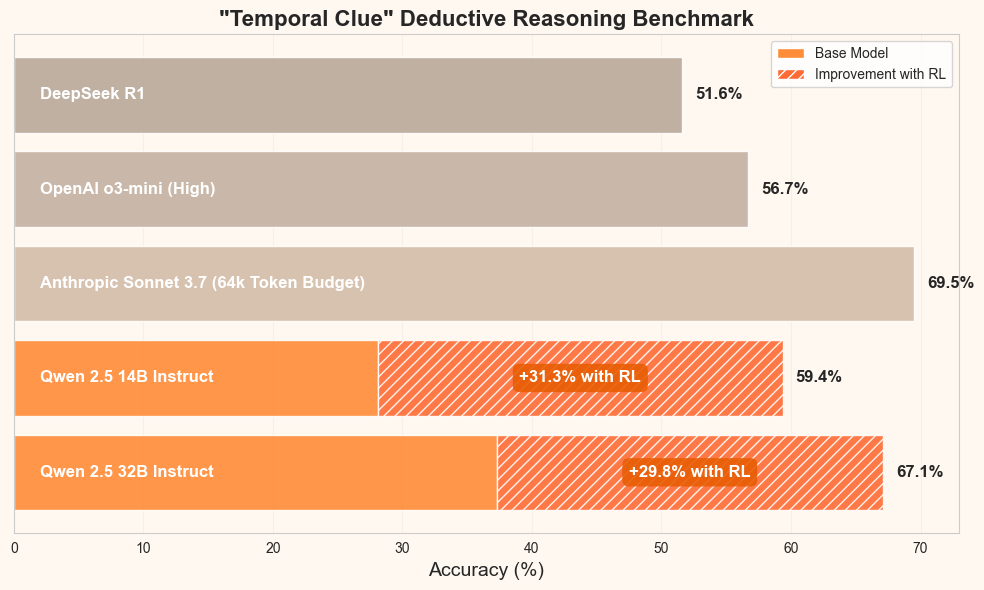

In [31]:
# Create a horizontal bar chart of accuracies
plt.figure(figsize=(10, 6))

# Filter for specific models
filtered_models = [
    "DeepSeek R1",
    "OpenAI o3-mini (High)",
    "Anthropic Sonnet 3.7 (64k Token Budget)",
    "Qwen 2.5 14B Instruct",
    "Qwen 2.5 32B Instruct",
]

# Create filtered lists
filtered_indices = [i for i, label in enumerate(labels) if label in filtered_models]
filtered_labels = [labels[i] for i in filtered_indices]
filtered_accuracies = [accuracies[i] for i in filtered_indices]
filtered_organizations = [organizations[i] for i in filtered_indices]

# Find the base and post-RL accuracies for Qwen 32B
base_qwen32_idx = labels.index("Qwen 2.5 32B Instruct")
post_rl_qwen32_idx = labels.index("Qwen 2.5 32B Instruct (Post-RL)")
base_accuracy32 = accuracies[base_qwen32_idx]
post_rl_accuracy32 = accuracies[post_rl_qwen32_idx]
improvement32 = post_rl_accuracy32 - base_accuracy32

# Find the base and post-RL accuracies for Qwen 14B
base_qwen14_idx = labels.index("Qwen 2.5 14B Instruct")
post_rl_qwen14_idx = labels.index("Qwen 2.5 14B Instruct (Post-RL)")
base_accuracy14 = accuracies[base_qwen14_idx]
post_rl_accuracy14 = accuracies[post_rl_qwen14_idx]
improvement14 = post_rl_accuracy14 - base_accuracy14

# Reverse the order of filtered lists
reversed_labels = filtered_labels[::-1]
reversed_accuracies = filtered_accuracies[::-1]
reversed_organizations = filtered_organizations[::-1]

# Define colors - orange family for Qwen models, muted colors for others
color_palette = {
    "Anthropic": "#D3BDA9",    # Light taupe
    "OpenAI": "#C4B1A2",       # Warm gray
    "DeepSeek": "#B8A99A",     # Muted beige
    "Qwen": "#FF8C38",         # Bright orange
}

# Set a light background color for the entire figure
plt.figure(figsize=(10, 6), facecolor="#FFF8F0")  # Very light orange/cream for figure background
ax = plt.gca()
ax.set_facecolor("#FFF8F0")  # Same light orange/cream for plot area

# Create the horizontal bar chart with the new color palette
bars = plt.barh(
    reversed_labels,
    reversed_accuracies,
    color=[color_palette.get(org, "#D4A76A") for org in reversed_organizations],
    alpha=0.9,  # Slightly increased opacity for more vibrant colors
)

# Add the improvement bar for Qwen 32B (stacked on top of base)
qwen32_idx = reversed_labels.index("Qwen 2.5 32B Instruct")
improvement32_bar = plt.barh(
    reversed_labels[qwen32_idx],
    improvement32,
    left=base_accuracy32,
    color="#FF6B35",  # Darker orange for improvement
    alpha=0.9,
    hatch="///",
)

# Add the improvement bar for Qwen 14B (stacked on top of base)
qwen14_idx = reversed_labels.index("Qwen 2.5 14B Instruct")
improvement14_bar = plt.barh(
    reversed_labels[qwen14_idx],
    improvement14,
    left=base_accuracy14,
    color="#FF6B35",  # Darker orange for improvement
    alpha=0.9,
    hatch="///",
)

# Add value labels to the right of each bar
for i, (bar, label) in enumerate(zip(bars, reversed_labels)):
    width = bar.get_width()
    
    # For Qwen models, show the post-RL accuracy
    if label == "Qwen 2.5 32B Instruct":
        display_width = width + improvement32
        plt.text(
            display_width + 1,
            bar.get_y() + bar.get_height() / 2.0,
            f"{display_width:.1f}%",
            ha="left",
            va="center",
            fontweight="bold",
            fontsize=12,
        )
    elif label == "Qwen 2.5 14B Instruct":
        display_width = width + improvement14
        plt.text(
            display_width + 1,
            bar.get_y() + bar.get_height() / 2.0,
            f"{display_width:.1f}%",
            ha="left",
            va="center",
            fontweight="bold",
            fontsize=12,
        )
    else:
        plt.text(
            width + 1,
            bar.get_y() + bar.get_height() / 2.0,
            f"{width:.1f}%",
            ha="left",
            va="center",
            fontweight="bold",
            fontsize=12,
        )
    
    # Add model name inside the bar
    plt.text(
        2,
        bar.get_y() + bar.get_height() / 2.0,
        label,
        ha="left",
        va="center",
        color="white",
        fontweight="bold",
        fontsize=12,
    )

# Add an arrow showing the improvement directly over the highlighted area for 32B
qwen32_bar_y = bars[qwen32_idx].get_y() + bars[qwen32_idx].get_height()/2.0
mid_point32 = base_accuracy32 + (improvement32/2)
plt.annotate(
    f"+{improvement32:.1f}% with RL",
    xy=(mid_point32, qwen32_bar_y),
    xytext=(mid_point32, qwen32_bar_y),  # Centered vertically in the bar
    arrowprops=dict(arrowstyle="-", color="#FFFFFF", lw=0),  # Invisible arrow
    color="#FFFFFF",  # White text to stand out on orange
    fontweight="bold",
    fontsize=12,  # Increased font size
    va="center",
    ha="center",
    bbox=dict(boxstyle="round,pad=0.4", fc="#E85D04", ec="none", alpha=0.9)  # Darker orange highlight box
)

# Add an arrow showing the improvement directly over the highlighted area for 14B
qwen14_bar_y = bars[qwen14_idx].get_y() + bars[qwen14_idx].get_height()/2.0
mid_point14 = base_accuracy14 + (improvement14/2)
plt.annotate(
    f"+{improvement14:.1f}% with RL",
    xy=(mid_point14, qwen14_bar_y),
    xytext=(mid_point14, qwen14_bar_y),  # Centered vertically in the bar
    arrowprops=dict(arrowstyle="-", color="#FFFFFF", lw=0),  # Invisible arrow
    color="#FFFFFF",  # White text to stand out on orange
    fontweight="bold",
    fontsize=12,  # Increased font size
    va="center",
    ha="center",
    bbox=dict(boxstyle="round,pad=0.4", fc="#E85D04", ec="none", alpha=0.9)  # Darker orange highlight box
)

# Add labels and title
plt.xlabel("Accuracy (%)", fontsize=14)
plt.title("\"Temporal Clue\" Deductive Reasoning Benchmark", fontsize=16, fontweight="bold")

# Hide y-axis labels
plt.yticks([])

# Add grid for better readability (only vertical lines)
plt.grid(axis="x", alpha=0.2)

# Add a legend to explain the stacked bar
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor="#FF8C38", label="Base Model"),
    Patch(facecolor="#FF6B35", hatch="///", label="Improvement with RL")
]
plt.legend(handles=legend_elements, loc="upper right")

# Adjust layout and display
plt.tight_layout()
plt.show()

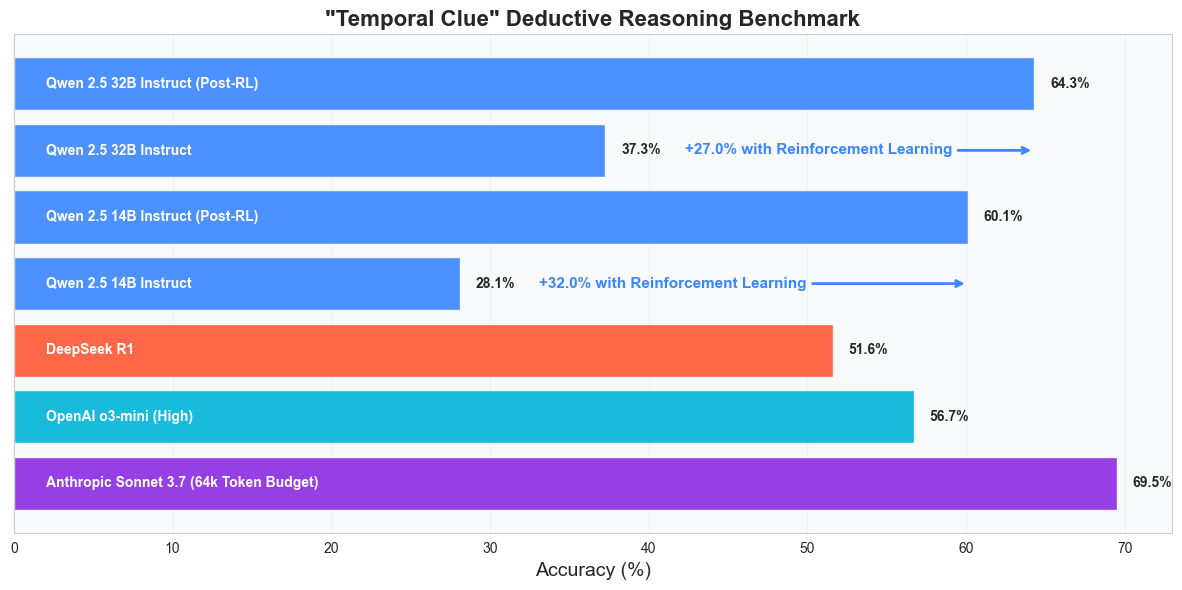

In [260]:
# Create a horizontal bar chart of accuracies
plt.figure(figsize=(12, 6))

# Filter for specific models
filtered_models = [
    "DeepSeek R1",
    "OpenAI o3-mini (High)",
    "Anthropic Sonnet 3.7 (64k Token Budget)",
    "Qwen 2.5 14B Instruct",
    "Qwen 2.5 14B Instruct (Post-RL)",
    "Qwen 2.5 32B Instruct",
    "Qwen 2.5 32B Instruct (Post-RL)",
]

# Create filtered lists
filtered_indices = [i for i, label in enumerate(labels) if label in filtered_models]
filtered_labels = [labels[i] for i in filtered_indices]
filtered_accuracies = [accuracies[i] for i in filtered_indices]
filtered_organizations = [organizations[i] for i in filtered_indices]

# Create a custom order to ensure trained variants are next to their base models
custom_order = []
model_pairs = {
    "Qwen 2.5 32B Instruct (Post-RL)": "Qwen 2.5 32B Instruct",
    "Qwen 2.5 14B Instruct (Post-RL)": "Qwen 2.5 14B Instruct"
}

# First add the RL models and their base pairs
for rl_model, base_model in model_pairs.items():
    if rl_model in filtered_labels:
        rl_idx = filtered_labels.index(rl_model)
        custom_order.append(rl_idx)
        
        base_idx = filtered_labels.index(base_model)
        custom_order.append(base_idx)

# Then add the remaining models
for i in range(len(filtered_labels)):
    if i not in custom_order:
        custom_order.append(i)

# Reorder the lists using the custom order
filtered_labels = [filtered_labels[i] for i in custom_order]
filtered_accuracies = [filtered_accuracies[i] for i in custom_order]
filtered_organizations = [filtered_organizations[i] for i in custom_order]

# Reverse the order for the horizontal bar chart
reversed_labels = filtered_labels[::-1]
reversed_accuracies = filtered_accuracies[::-1]
reversed_organizations = filtered_organizations[::-1]

# Define a more attractive and vibrant color palette with better contrast
color_palette = {
    "Anthropic": "#8A2BE2",    # Blue Violet - rich purple
    "OpenAI": "#00B4D8",       # Vivid cyan/blue
    "DeepSeek": "#FF5733",     # Bright coral/orange
    "Qwen": "#3A86FF",         # Bright blue
    "Qwen (Post-RL)": "#4361EE" # Royal blue
}

# Create the horizontal bar chart with the new color palette
bars = plt.barh(
    reversed_labels,
    reversed_accuracies,
    color=[color_palette.get(org, "#6A5ACD") for org in reversed_organizations],
    alpha=0.9,  # Slightly increased opacity for more vibrant colors
)

# Add value labels to the right of each bar
for i, (bar, label) in enumerate(zip(bars, reversed_labels)):
    width = bar.get_width()
    plt.text(
        width + 1,
        bar.get_y() + bar.get_height() / 2.0,
        f"{width:.1f}%",
        ha="left",
        va="center",
        fontweight="bold",
    )
    # Add model name inside the bar
    plt.text(
        2,
        bar.get_y() + bar.get_height() / 2.0,
        label,
        ha="left",
        va="center",
        color="white",
        fontweight="bold",
    )

# Find indices of the RL models and their base models in the reversed list
for i, label in enumerate(reversed_labels):
    if "(Post-RL)" in label:
        rl_model_idx = i
        base_model_label = label.replace(" (Post-RL)", "")
        base_model_idx = reversed_labels.index(base_model_label)
        
        # Add an arrow showing the improvement
        base_model_y = bars[base_model_idx].get_y() + bars[base_model_idx].get_height()/2.0
        base_model_width = bars[base_model_idx].get_width()
        post_rl_width = bars[rl_model_idx].get_width()
        
        plt.annotate(
            f"+{post_rl_width - base_model_width:.1f}% with Reinforcement Learning",
            xy=(post_rl_width, base_model_y),
            xytext=(base_model_width + 5, base_model_y),
            arrowprops=dict(arrowstyle="->", color="#3A86FF", lw=2),
            color="#3A86FF",
            fontweight="bold",
            fontsize=11,
            va="center"
        )

# Add labels and title
plt.xlabel("Accuracy (%)", fontsize=14)
plt.title("\"Temporal Clue\" Deductive Reasoning Benchmark", fontsize=16, fontweight="bold")

# Hide y-axis labels
plt.yticks([])

# Add grid for better readability (only vertical lines)
plt.grid(axis="x", alpha=0.2)

# Set a light background color
plt.gca().set_facecolor("#F8FAFC")  # Very light blue-gray

# Adjust layout and display
plt.tight_layout()
plt.show()

In [218]:
costs

[0.029,
 0.901,
 0.068,
 0.17,
 0.017,
 0.222,
 0.392,
 0.0004194,
 0.00189,
 0.0005338,
 0.0024003]

In [125]:
model.intercept_

-1.0345375927586926

In [59]:
future_iter

500